### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

C:\Users\HP\Anaconda3\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
C:\Users\HP\Anaconda3\lib\site-packages\nltk\lm\counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict


In [2]:
# df1 - Raw
df1 = pd.read_csv('ethiopia_tripadvisor_data_1.csv')
df1.head()

,Destination Name,Destination Type,Rating,Review Head,Review Body,Date
0,Rock-Hewn Churches of Lalibela,Landmarks,5,Incredible locations don't be put off thinking...,Amazing location must visit. This site is mark...,October 2019
1,Rock-Hewn Churches of Lalibela,Landmarks,5,It is a real miracle of the world!,I do recommend to visit Lalibela churches and ...,October 2019
2,Rock-Hewn Churches of Lalibela,Landmarks,5,Incredible experience,A must visit in Ethiopia - one of the most uni...,October 2019
3,Rock-Hewn Churches of Lalibela,Landmarks,4,Amazing,These churches have to be seen to be believed....,October 2019
4,Rock-Hewn Churches of Lalibela,Landmarks,5,So much history,Thanks to our tour organiser Ephram who is bas...,October 2019


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8413 entries, 0 to 8412
Data columns (total 6 columns):
Destination Name    8413 non-null object
Destination Type    8413 non-null object
Rating              8413 non-null int64
Review Head         8413 non-null object
Review Body         8413 non-null object
Date                8413 non-null object
dtypes: int64(1), object(5)
memory usage: 394.4+ KB


In [4]:
df1.describe()

,Rating
count,8413.000000
mean,4.396291
std,0.848397
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [5]:
# df2 - Adding Features
df2 = df1.copy()

In [6]:
print(df2.info())
df2 = df2.mask(df2.eq('None')).dropna()
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8413 entries, 0 to 8412
Data columns (total 6 columns):
Destination Name    8413 non-null object
Destination Type    8413 non-null object
Rating              8413 non-null int64
Review Head         8413 non-null object
Review Body         8413 non-null object
Date                8413 non-null object
dtypes: int64(1), object(5)
memory usage: 394.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8311 entries, 0 to 8412
Data columns (total 6 columns):
Destination Name    8311 non-null object
Destination Type    8311 non-null object
Rating              8311 non-null int64
Review Head         8311 non-null object
Review Body         8311 non-null object
Date                8311 non-null object
dtypes: int64(1), object(5)
memory usage: 454.5+ KB
None


C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [7]:
df2['Polarity'] = df2['Rating'].apply(lambda x: 0 if x < 3 else 1)

df2['Review Text'] = df2['Review Head'] + ' ' + df2['Review Body'] # Review Text = Review Head + Review Body 
df2['Review Head Length'] = df2['Review Head'].astype(str).map(len)
df2['Review Body Length'] = df2['Review Body'].astype(str).map(len)
df2['Review Text Length'] = df2['Review Text'].astype(str).map(len)

Q1 = ['January', 'February', 'March']
Q2 = ['April', 'May', 'June']
Q3 = ['July', 'August', 'September']
Q4 = ['October', 'November', 'December']

def Quarter(row):
    if row['Month'] in Q1:
        return 1
    elif row['Month'] in Q2:
        return 2
    elif row['Month'] in Q3:
        return 3
    elif row['Month'] in Q4:
        return 4

df2['Month'] = df2['Date'].apply(lambda x: x.split(' ')[0])
df2['Year'] = df2['Date'].apply(lambda x: x.split(' ')[-1])
df2['Year Quarter'] = df2.apply(Quarter, axis = 1)
df2 = df2[['Destination Name', 'Destination Type', 'Rating', 'Polarity', 'Date', 'Month', 'Year', 'Year Quarter',
           'Review Head', 'Review Body', 'Review Text', 'Review Head Length', 'Review Body Length', 'Review Text Length']]
df2.head()

,Destination Name,Destination Type,Rating,Polarity,Date,Month,Year,Year Quarter,Review Head,Review Body,Review Text,Review Head Length,Review Body Length,Review Text Length
0,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,Incredible locations don't be put off thinking...,Amazing location must visit. This site is mark...,Incredible locations don't be put off thinking...,72,179,252
1,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,It is a real miracle of the world!,I do recommend to visit Lalibela churches and ...,It is a real miracle of the world! I do recomm...,34,233,268
2,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,Incredible experience,A must visit in Ethiopia - one of the most uni...,Incredible experience A must visit in Ethiopi...,22,103,126
3,Rock-Hewn Churches of Lalibela,Landmarks,4,1,October 2019,October,2019,4,Amazing,These churches have to be seen to be believed....,Amazing These churches have to be seen to be b...,7,241,249
4,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,So much history,Thanks to our tour organiser Ephram who is bas...,So much history Thanks to our tour organiser E...,15,243,259


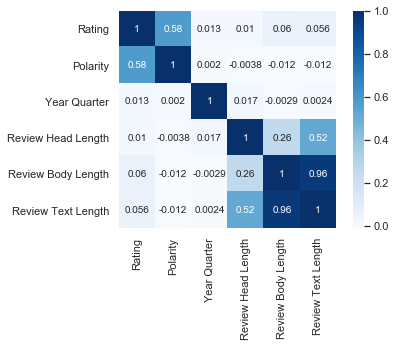

In [8]:
corr = df2.corr()
sns.heatmap(corr, annot = True, square = True, cmap = "Blues")

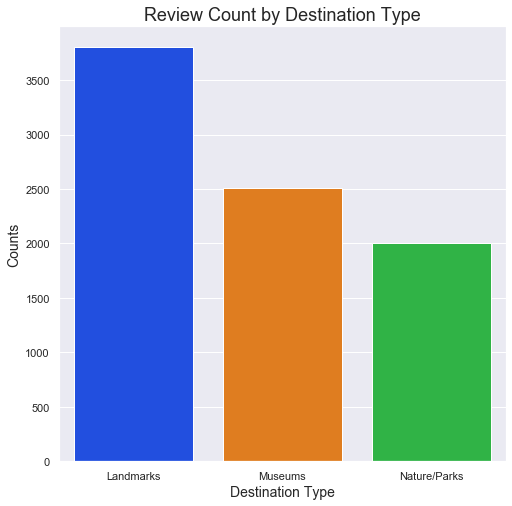

In [9]:
# print(df2['Destination Type'].value_counts())
plt.figure(figsize = (8, 8))
sns.countplot(x = 'Destination Type', data = df2, palette = 'bright')
plt.title('Review Count by Destination Type', fontsize = 18)
plt.xlabel('Destination Type', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.show()

In [10]:
print(df2['Destination Type'].value_counts())

Landmarks       3803
Museums         2507
Nature/Parks    2001
Name: Destination Type, dtype: int64


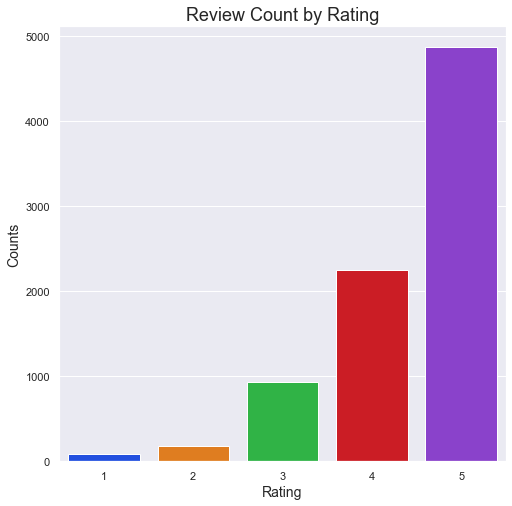

In [11]:
# print(df2['Rating'].value_counts())
plt.figure(figsize = (8, 8))
sns.countplot(x = 'Rating', data = df2, palette = 'bright')
plt.title('Review Count by Rating', fontsize = 18)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.show()

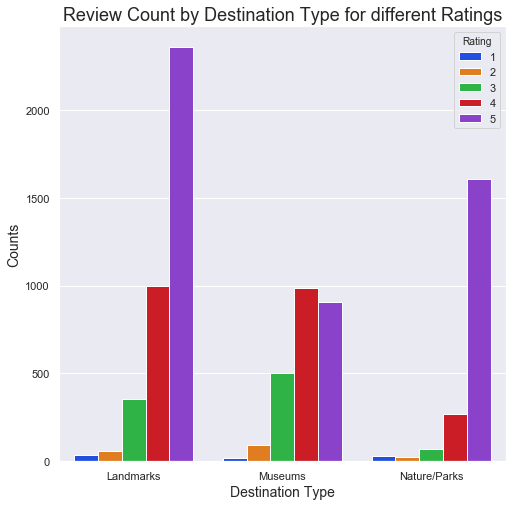

In [12]:
plt.figure(figsize = (8, 8))
sns.countplot(x = 'Destination Type', data = df2, palette = 'bright', hue = 'Rating')
plt.title('Review Count by Destination Type for different Ratings', fontsize = 18)
plt.xlabel('Destination Type', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.show()

In [13]:
df2['Polarity'].value_counts()

1    8049
0     262
Name: Polarity, dtype: int64

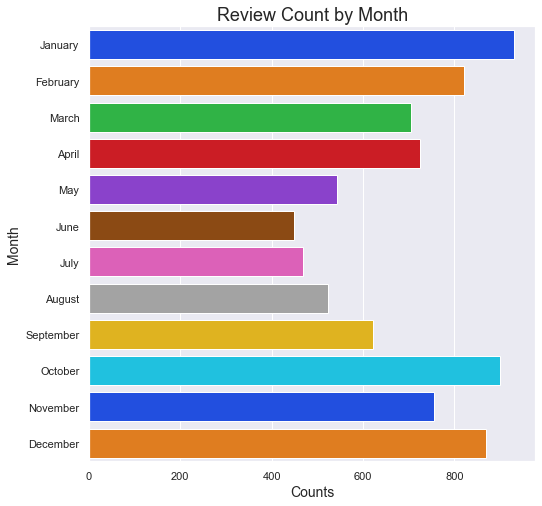

In [14]:
# print(df2['Month'].value_counts())
plt.figure(figsize = (8, 8))
sns.countplot(y = 'Month', data = df2, palette = 'bright', 
              order = ['January', 'February', 'March', 'April', 'May', 'June',
                       'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Review Count by Month', fontsize = 18)
plt.xlabel('Counts', fontsize = 14)
plt.ylabel('Month', fontsize = 14)
plt.show()

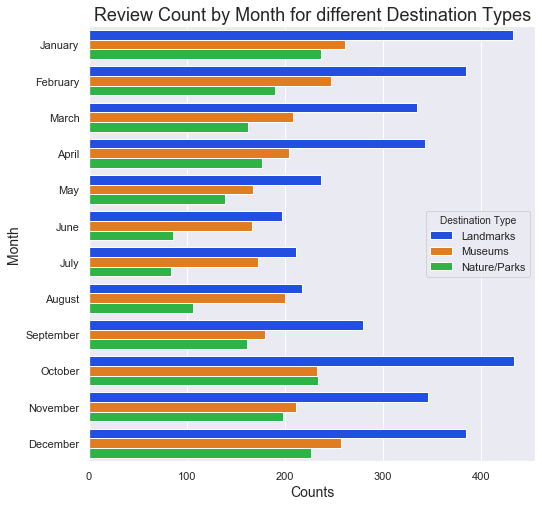

In [15]:
plt.figure(figsize = (8, 8))
sns.countplot(y = 'Month', data = df2, palette = 'bright', hue = 'Destination Type', 
              order = ['January', 'February', 'March', 'April', 'May', 'June',
                       'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Review Count by Month for different Destination Types', fontsize = 18)
plt.xlabel('Counts', fontsize = 14)
plt.ylabel('Month', fontsize = 14)
plt.show()

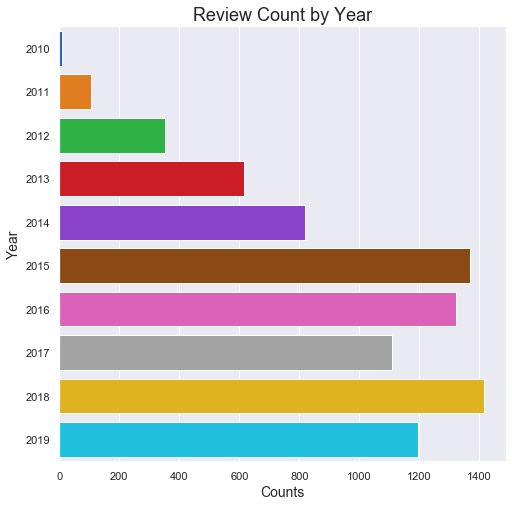

In [16]:
# print(df2['Year'].value_counts())
plt.figure(figsize = (8, 8))
sns.countplot(y = 'Year', data = df2, palette = 'bright')
plt.title('Review Count by Year', fontsize = 18)
plt.xlabel('Counts', fontsize = 14)
plt.ylabel('Year', fontsize = 14)
plt.show()

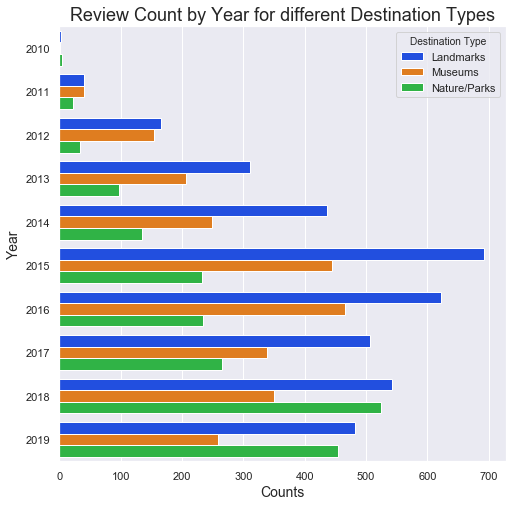

In [17]:
plt.figure(figsize = (8, 8))
sns.countplot(y = 'Year', data = df2, palette = 'bright', hue = 'Destination Type')
plt.title('Review Count by Year for different Destination Types', fontsize = 18)
plt.xlabel('Counts', fontsize = 14)
plt.ylabel('Year', fontsize = 14)
plt.show()

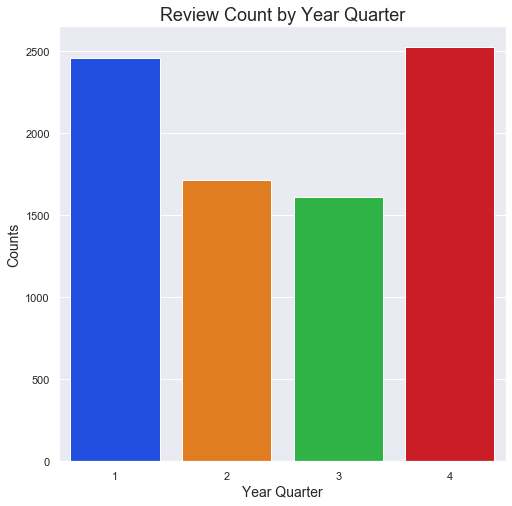

In [18]:
# print(df2['Year Quarter'].value_counts())
plt.figure(figsize = (8, 8))
sns.countplot(x = 'Year Quarter', data = df2, palette = 'bright')
plt.title('Review Count by Year Quarter', fontsize = 18)
plt.xlabel('Year Quarter', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.show()

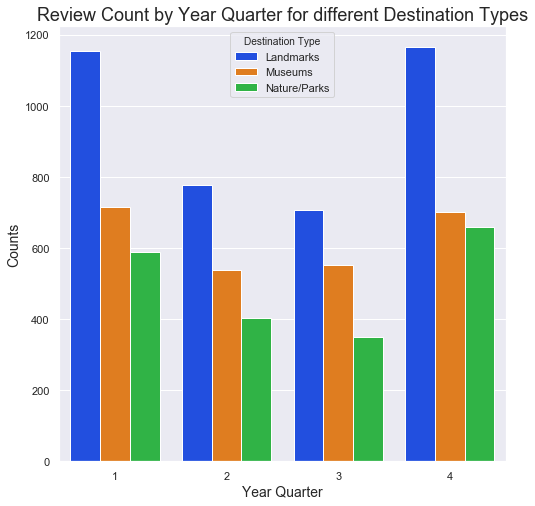

In [19]:
plt.figure(figsize = (8, 8))
sns.countplot(x = 'Year Quarter', data = df2, palette = 'bright', hue = 'Destination Type')
plt.title('Review Count by Year Quarter for different Destination Types', fontsize = 18)
plt.xlabel('Year Quarter', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.show()

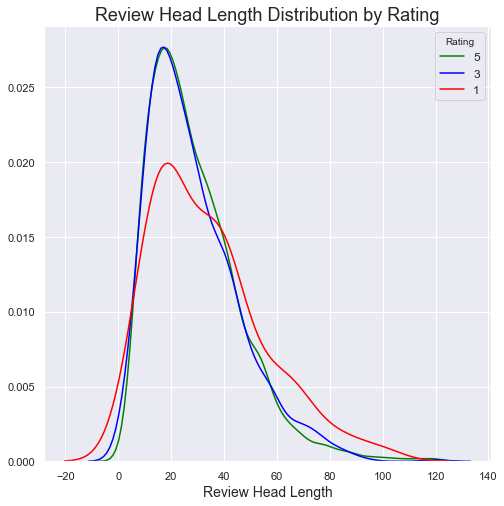

In [20]:
# sns.distplot(df2['Review Head Length'], hist = False, kde = True, color = 'yellow')
plt.figure(figsize = (8, 8))
sns.distplot(df2[df2['Rating'] == 5]['Review Head Length'], hist = False, kde = True, label = '5', color = 'green')
sns.distplot(df2[df2['Rating'] == 3]['Review Head Length'], hist = False, kde = True, label = '3', color = 'blue')
sns.distplot(df2[df2['Rating'] == 1]['Review Head Length'], hist = False, kde = True, label = '1', color = 'red')
plt.title('Review Head Length Distribution by Rating', fontsize = 18)
plt.xlabel('Review Head Length', fontsize = 14)
plt.legend(title = 'Rating', fontsize = 12)
plt.show()

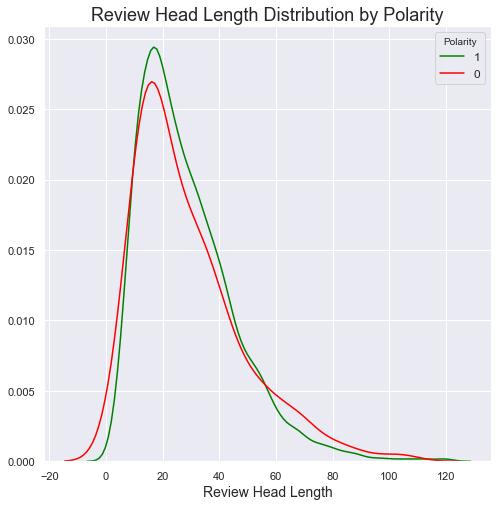

In [21]:
plt.figure(figsize = (8, 8))
sns.distplot(df2[df2['Polarity'] == 1]['Review Head Length'], hist = False, kde = True, label = '1', color = 'green')
sns.distplot(df2[df2['Polarity'] == 0]['Review Head Length'], hist = False, kde = True, label = '0', color = 'red')
plt.title('Review Head Length Distribution by Polarity', fontsize = 18)
plt.xlabel('Review Head Length', fontsize = 14)
plt.legend(title = 'Polarity', fontsize = 12)
plt.show()

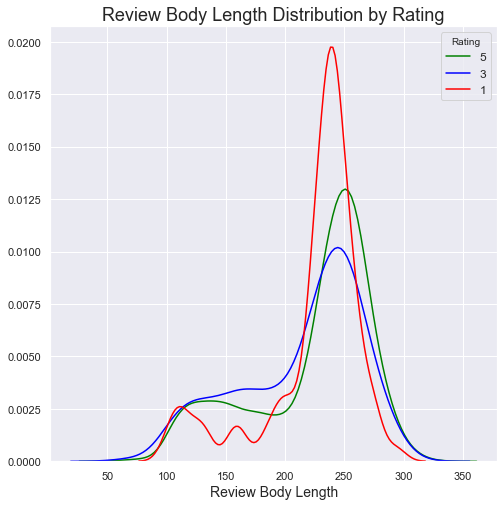

In [22]:
# sns.distplot(df2['Review Body Length'], hist = False, kde = True, color = 'yellow')
plt.figure(figsize = (8, 8))
sns.distplot(df2[df2['Rating'] == 5]['Review Body Length'], hist = False, kde = True, label = '5', color = 'green')
sns.distplot(df2[df2['Rating'] == 3]['Review Body Length'], hist = False, kde = True, label = '3', color = 'blue')
sns.distplot(df2[df2['Rating'] == 1]['Review Body Length'], hist = False, kde = True, label = '1', color = 'red')
plt.title('Review Body Length Distribution by Rating', fontsize = 18)
plt.xlabel('Review Body Length', fontsize = 14)
plt.legend(title = 'Rating', fontsize = 12)
plt.show()

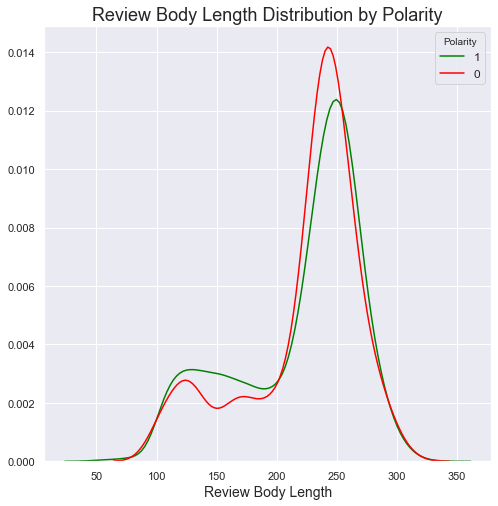

In [23]:
plt.figure(figsize = (8, 8))
sns.distplot(df2[df2['Polarity'] == 1]['Review Body Length'], hist = False, kde = True, label = '1', color = 'green')
sns.distplot(df2[df2['Polarity'] == 0]['Review Body Length'], hist = False, kde = True, label = '0', color = 'red')
plt.title('Review Body Length Distribution by Polarity', fontsize = 18)
plt.xlabel('Review Body Length', fontsize = 14)
plt.legend(title = 'Polarity', fontsize = 12)
plt.show()

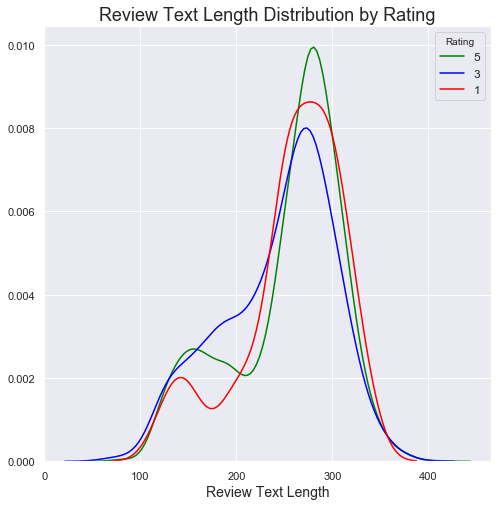

In [24]:
# sns.distplot(df2['Review Text Length'], hist = False, kde = True, color = 'yellow')
plt.figure(figsize = (8, 8))
sns.distplot(df2[df2['Rating'] == 5]['Review Text Length'], hist = False, kde = True, label = '5', color = 'green')
sns.distplot(df2[df2['Rating'] == 3]['Review Text Length'], hist = False, kde = True, label = '3', color = 'blue')
sns.distplot(df2[df2['Rating'] == 1]['Review Text Length'], hist = False, kde = True, label = '1', color = 'red')
plt.title('Review Text Length Distribution by Rating', fontsize = 18)
plt.xlabel('Review Text Length', fontsize = 14)
plt.legend(title = 'Rating', fontsize = 12)
plt.show()

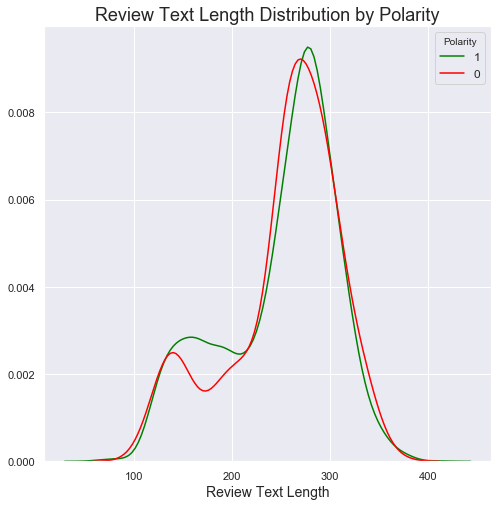

In [25]:
plt.figure(figsize = (8, 8))
sns.distplot(df2[df2['Polarity'] == 1]['Review Text Length'], hist = False, kde = True, label = '1', color = 'green')
sns.distplot(df2[df2['Polarity'] == 0]['Review Text Length'], hist = False, kde = True, label = '0', color = 'red')
plt.title('Review Text Length Distribution by Polarity', fontsize = 18)
plt.xlabel('Review Text Length', fontsize = 14)
plt.legend(title = 'Polarity', fontsize = 12)
plt.show()

In [26]:
# df3 Text Preprocessing
df3 = df2.copy()
df3.head()

,Destination Name,Destination Type,Rating,Polarity,Date,Month,Year,Year Quarter,Review Head,Review Body,Review Text,Review Head Length,Review Body Length,Review Text Length
0,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,Incredible locations don't be put off thinking...,Amazing location must visit. This site is mark...,Incredible locations don't be put off thinking...,72,179,252
1,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,It is a real miracle of the world!,I do recommend to visit Lalibela churches and ...,It is a real miracle of the world! I do recomm...,34,233,268
2,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,Incredible experience,A must visit in Ethiopia - one of the most uni...,Incredible experience A must visit in Ethiopi...,22,103,126
3,Rock-Hewn Churches of Lalibela,Landmarks,4,1,October 2019,October,2019,4,Amazing,These churches have to be seen to be believed....,Amazing These churches have to be seen to be b...,7,241,249
4,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,So much history,Thanks to our tour organiser Ephram who is bas...,So much history Thanks to our tour organiser E...,15,243,259


In [27]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace('(<br/>)', '')
    ReviewText = ReviewText.str.replace('br', '')
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
df3['Review Text'] = preprocess(df3['Review Text'])
df3.head()

,Destination Name,Destination Type,Rating,Polarity,Date,Month,Year,Year Quarter,Review Head,Review Body,Review Text,Review Head Length,Review Body Length,Review Text Length
0,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,Incredible locations don't be put off thinking...,Amazing location must visit. This site is mark...,Incredible locations don't be put off thinking...,72,179,252
1,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,It is a real miracle of the world!,I do recommend to visit Lalibela churches and ...,It is a real miracle of the world! I do recomm...,34,233,268
2,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,Incredible experience,A must visit in Ethiopia - one of the most uni...,Incredible experience A must visit in Ethiopi...,22,103,126
3,Rock-Hewn Churches of Lalibela,Landmarks,4,1,October 2019,October,2019,4,Amazing,These churches have to be seen to be believed....,Amazing These churches have to be seen to be b...,7,241,249
4,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,So much history,Thanks to our tour organiser Ephram who is bas...,So much history Thanks to our tour organiser E...,15,243,259


### Modelling

Refer to Anurag's notebook accordingly (and learn concepts)

In [28]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words1 = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
stop_words2 = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]

In [30]:
stop_words3 = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "A", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "after", "afterwards", "ag", "again", "against", "ah", "ain", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appreciate", "approximately", "ar", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", "asking", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "B", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "been", "before", "beforehand", "beginnings", "behind", "below", "beside", "besides", "best", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "C", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "ci", "cit", "cj", "cl", "clearly", "cm", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "could", "couldn", "couldnt", "course", "cp", "cq", "cr", "cry", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d", "D", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "dj", "dk", "dl", "do", "does", "doesn", "doing", "don", "done", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "E", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "F", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "G", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "H", "h2", "h3", "had", "hadn", "happens", "hardly", "has", "hasn", "hasnt", "have", "haven", "having", "he", "hed", "hello", "help", "hence", "here", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hh", "hi", "hid", "hither", "hj", "ho", "hopefully", "how", "howbeit", "however", "hr", "hs", "http", "hu", "hundred", "hy", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "im", "immediately", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "inward", "io", "ip", "iq", "ir", "is", "isn", "it", "itd", "its", "iv", "ix", "iy", "iz", "j", "J", "jj", "jr", "js", "jt", "ju", "just", "k", "K", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "ko", "l", "L", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "M", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "my", "n", "N", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "neither", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "O", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "otherwise", "ou", "ought", "our", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "P", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "pp", "pq", "pr", "predominantly", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "Q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "R", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "S", "s2", "sa", "said", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "seem", "seemed", "seeming", "seems", "seen", "sent", "seven", "several", "sf", "shall", "shan", "shed", "shes", "show", "showed", "shown", "showns", "shows", "si", "side", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somehow", "somethan", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "sz", "t", "T", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "thats", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "thereof", "therere", "theres", "thereto", "thereupon", "these", "they", "theyd", "theyre", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "U", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "used", "useful", "usefully", "usefulness", "using", "usually", "ut", "v", "V", "va", "various", "vd", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "W", "wa", "was", "wasn", "wasnt", "way", "we", "wed", "welcome", "well", "well-b", "went", "were", "weren", "werent", "what", "whatever", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "whom", "whomever", "whos", "whose", "why", "wi", "widely", "with", "within", "without", "wo", "won", "wonder", "wont", "would", "wouldn", "wouldnt", "www", "x", "X", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "Y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "your", "youre", "yours", "yr", "ys", "yt", "z", "Z", "zero", "zi", "zz"]

In [31]:
stop_words4 = list(set(set(stop_words1) | set(stop_words2) | set(stop_words3)))

In [32]:
ethiopia_stop_words = ['ethiopia', 'rock', 'hewn', 'church', 'churches', 'park', 'parks', 'museum', 'museums', 'omo', 'valley',
                       'mountain', 'mountains', 'addis', 'ababa']

In [33]:
stop_words5 = list(set(set(stop_words4) | set(ethiopia_stop_words)))

In [34]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer 
vect = TfidfVectorizer(stop_words = stop_words1, min_df = 10, max_df = 0.9)# Drop words which occur in less than 10 documents / > 90% of docs
x = vect.fit_transform(df2['Review Text'].values.astype('U'))

In [35]:
# # Counts
# from sklearn.feature_extraction.text import CountVectorizer
# vect = CountVectorizer(stop_words = stop_words1, min_df=20, max_df=0.8)
# x = vect.fit_transform(df2['Review Text'].values.astype('U'))

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(x, df2['Rating'], test_size=0.33)
reg = LinearRegression().fit(X_train, y_train)

predicted = reg.predict(X_train)
print('train score: ',r2_score(y_train, predicted))
predicted = reg.predict(X_test)
print('test score: ', r2_score(y_test, predicted))

train score:  0.655753532979625
test score:  -0.04486676997039285


In [37]:
# RandomUnderSampler tried to undersample the majority class/target variable so that we get about equal number of observations.
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler()
nx, ny = rus.fit_resample(x, df2['Rating'])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(nx, ny, test_size=0.33)
reg = LinearRegression().fit(X_train, y_train)

predicted = reg.predict(X_train)
print('train score: ',r2_score(y_train, predicted))
predicted = reg.predict(X_test)
print('test score: ', r2_score(y_test, predicted))

train score:  0.9999999999999972
test score:  0.2262737930198755


In [39]:
# #takes a long time

# from sklearn.linear_model import LassoCV

# reg = LassoCV().fit(X_train, y_train)

# predicted = reg.predict(X_train)
# print('train score: ',r2_score(y_train, predicted))
# predicted = reg.predict(X_test)
# print('test score: ', r2_score(y_test, predicted))

In [40]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=250, algorithm='arpack')
new_x = svd.fit_transform(X_train)

reg = LinearRegression().fit(new_x, y_train)

predicted = reg.predict(new_x)
print('train score: ',r2_score(y_train, predicted))
predicted = reg.predict(svd.transform(X_test))
print('test score: ', r2_score(y_test, predicted))

train score:  0.953394489906806
test score:  0.1557921406926671


In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np

(np.sqrt(mean_squared_error(y_test, predicted)))

1.3258442776239354

In [42]:
# Polarity Analysis
# Case 1: Negative Sentiment if Rating < 3
ny_train = [0 if x < 3 else 1 for x in y_train]
ny_test = [0 if x < 3 else 1 for x in y_test]

In [43]:
from sklearn.feature_selection import SelectKBest, f_regression


selector = SelectKBest(f_regression, k=500)
n_X_train = selector.fit_transform(X_train, y_train)
n_X_test = selector.transform(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [44]:
# Anurag SVC
from sklearn.svm import SVC

svc = SVC(gamma='auto', kernel='linear')
svc.fit(new_x, ny_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
import sklearn.metrics

predicted = svc.predict(svd.transform(X_test))

from sklearn.metrics import classification_report
print(classification_report(ny_test, predicted))
#with RandomUnderSampler (low support)

              precision    recall  f1-score   support

           0       0.68      0.37      0.48        62
           1       0.62      0.85      0.72        75

    accuracy                           0.64       137
   macro avg       0.65      0.61      0.60       137
weighted avg       0.65      0.64      0.61       137



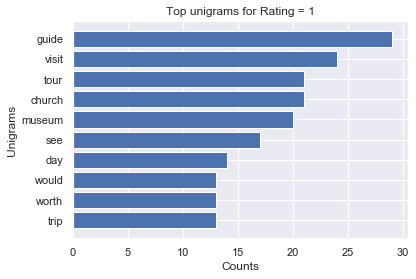

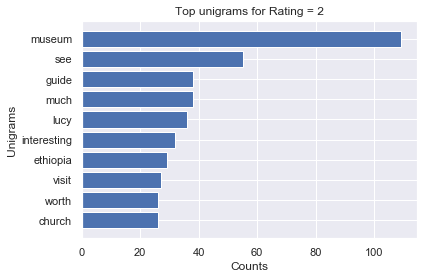

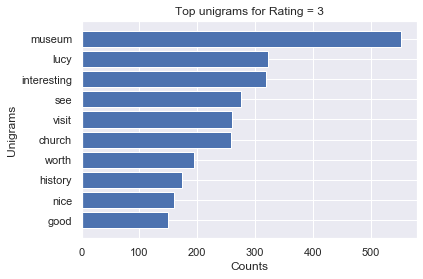

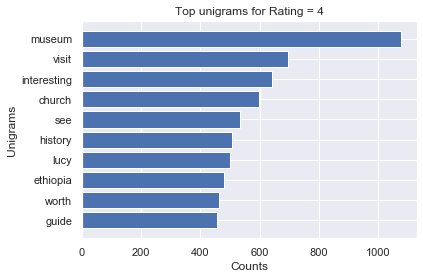

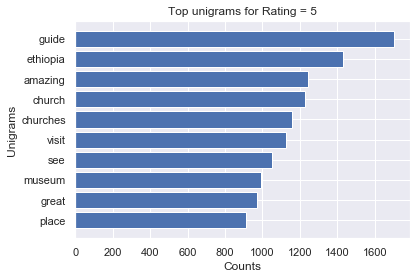

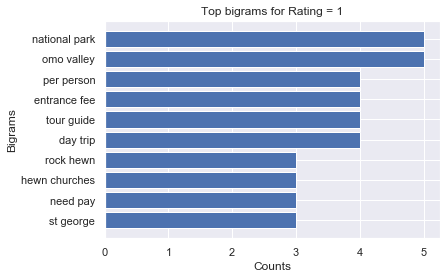

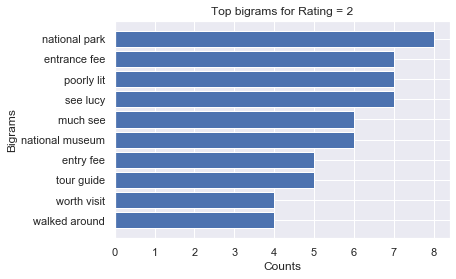

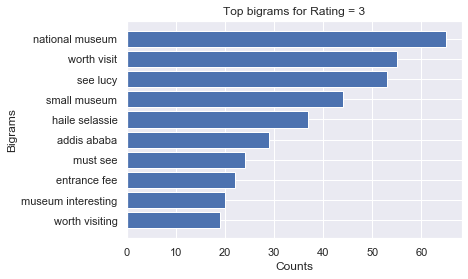

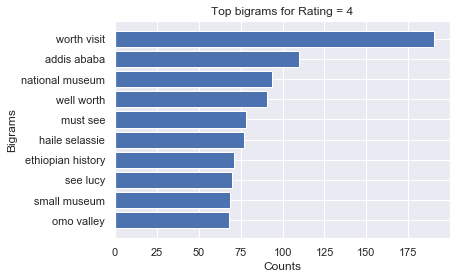

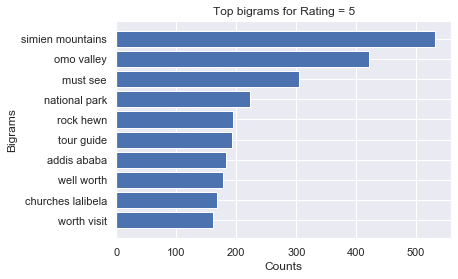

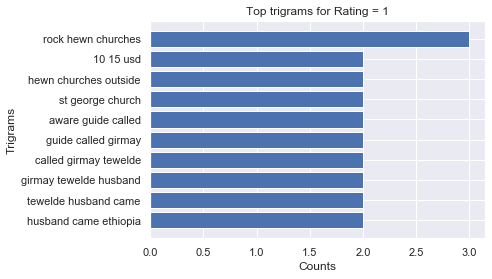

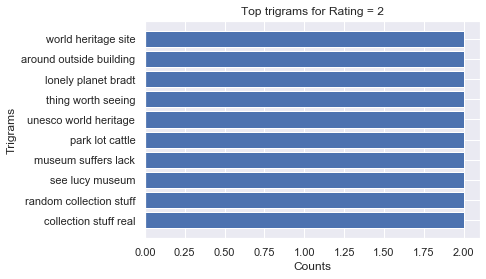

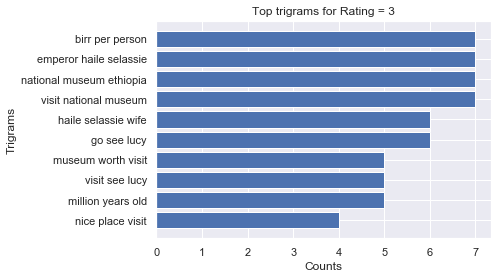

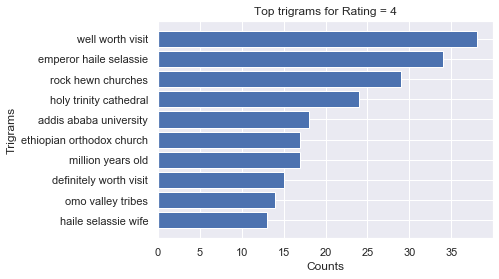

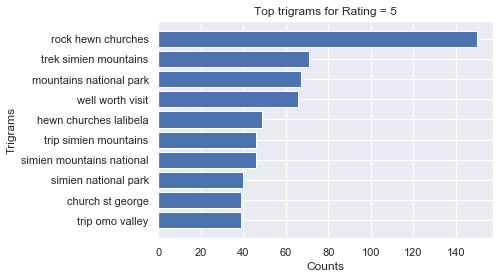

In [74]:
# Top ngrams by count
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_ngrams_counts(corpus, n = None, ng = None):
    vect = CountVectorizer(stop_words = stop_words1, ngram_range = (ng, ng)).fit(corpus)
    bag_of_words = vect.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

for i in range(1, 6):
    count = i
    common_words = get_top_n_ngrams_counts(df3[df3['Rating'] == i]['Review Text'], 10, 1)
    common_words.reverse()
    xs, ys = zip(*common_words)
    plt.figure()
    plt.barh(xs, ys)
    plt.title(('Top unigrams for Rating = ' + str(count)))
    plt.xlabel('Counts')
    plt.ylabel('Unigrams')
    
for i in range(1, 6):
    count = i
    common_words = get_top_n_ngrams_counts(df3[df3['Rating'] == i]['Review Text'], 10, 2)
    common_words.reverse()
    xs, ys = zip(*common_words)
    plt.figure()
    plt.barh(xs, ys)
    plt.title(('Top bigrams for Rating = ' + str(count)))
    plt.xlabel('Counts')
    plt.ylabel('Bigrams')
    
for i in range(1, 6):
    count = i
    common_words = get_top_n_ngrams_counts(df3[df3['Rating'] == i]['Review Text'], 10, 3)
    common_words.reverse()
    xs, ys = zip(*common_words)
    plt.figure()
    plt.barh(xs, ys)
    plt.title(('Top trigrams for Rating = ' + str(count)))
    plt.xlabel('Counts')
    plt.ylabel('Trigrams')
# df_top_words = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

In [85]:
# Top bigrams by TF-IDF
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer 
# vect = TfidfVectorizer(stop_words = stop_words5, max_features = 50, min_df = 10, max_df = 0.9)# Drop words which occur in less than 10 documents / > 90% of docs
# x = vect.fit_transform(df3['Review Text'].values.astype('U'))
# print(vect.get_feature_names())

def get_top_n_ngrams_tfidf(corpus, n = None, ng = None):
    vect = TfidfVectorizer(stop_words = stop_words5, ngram_range = (ng, ng), max_features = n)
    x = vect.fit_transform(corpus.values.astype('U'))
    print('ngram type = ', ng)
    print(vect.get_feature_names())
    print(len(vect.get_feature_names()))

print('Rating = 1:')
get_top_n_ngrams_tfidf(df3[df3['Rating'] == 1]['Review Text'], n = 20, ng = 2)
print('Rating = 3:')
get_top_n_ngrams_tfidf(df3[df3['Rating'] == 3]['Review Text'], n = 20, ng = 2)
print('Rating = 5:')
get_top_n_ngrams_tfidf(df3[df3['Rating'] == 5]['Review Text'], n = 20, ng = 2)

Rating = 1:
ngram type =  2
['500 birr', 'bad experience', 'danakil depression', 'day trip', 'dee damo', 'entrance fee', 'fisseha tsegay', 'girmay tewalde', 'girmay tewelde', 'great reviews', 'horrible experience', 'husband spent', 'simian danakil', 'simien image', 'simien national', 'spent 23', 'tour company', 'tour guide', 'waste time', 'worth visit']
20
Rating = 3:
ngram type =  2
['100 birr', '200 birr', 'entrance fee', 'ethiopian history', 'famous lucy', 'ground floor', 'haile selassie', 'interesting place', 'interesting visit', 'lucy interesting', 'lucy replica', 'nice place', 'place visit', 'red terror', 'skeleton lucy', 'small interesting', 'tour guide', 'visit lucy', 'worth visit', 'worth visiting']
20
Rating = 5:
ngram type =  2
['amazing experience', 'amazing place', 'day tour', 'day trek', 'day trip', 'ethiopian history', 'good guide', 'great experience', 'great guide', 'haile selassie', 'highly recommend', 'local guide', 'place visit', 'red terror', 'simien national', 'sim

In [86]:
df3['Polarity'].value_counts()

1    8049
0     262
Name: Polarity, dtype: int64

In [87]:
df3['Rating'].value_counts()

5    4866
4    2249
3     934
2     179
1      83
Name: Rating, dtype: int64

In [88]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans

# vect = TfidfVectorizer(stop_words = stop_words1, min_df = 10, max_df = 0.9)# Drop words which occur in less than 10 documents / > 90% of docs
# x = vect.fit_transform(df2['Review Text'].values.astype('U'))

# for n_clusters in range(3,10):
#     kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
#     kmeans.fit(x)
#     clusters = kmeans.predict(x)
#     silhouette_avg = silhouette_score(x, clusters)
#     print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

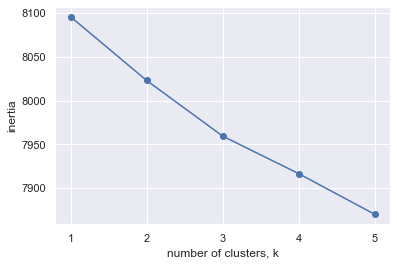

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vect = TfidfVectorizer(stop_words = stop_words1, min_df = 10, max_df = 0.9)# Drop words which occur in less than 10 documents / > 90% of docs
x = vect.fit_transform(df2['Review Text'].values.astype('U'))

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(x)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

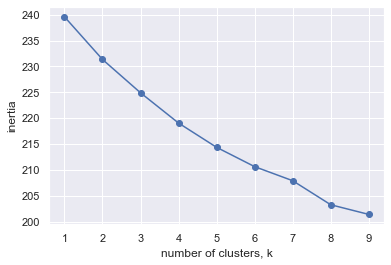

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vect = TfidfVectorizer(stop_words = stop_words1, min_df = 10, max_df = 0.9)# Drop words which occur in less than 10 documents / > 90% of docs
x = vect.fit_transform(df2[df2['Polarity'] == 0]['Review Text'].values.astype('U'))

ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(x)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

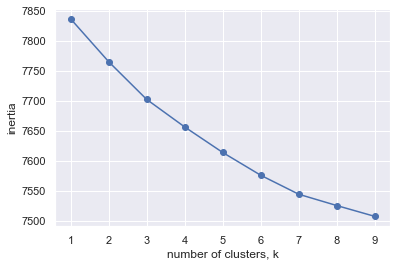

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vect = TfidfVectorizer(stop_words = stop_words1, min_df = 10, max_df = 0.9)# Drop words which occur in less than 10 documents / > 90% of docs
x = vect.fit_transform(df2[df2['Polarity'] == 1]['Review Text'].values.astype('U'))

ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(x)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vect = TfidfVectorizer(stop_words = stop_words1, min_df = 10, max_df = 0.9)# Drop words which occur in less than 10 documents / > 90% of docs
x = vect.fit_transform(df2[df2['Rating'] == 5]['Review Text'].values.astype('U'))

ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(x)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

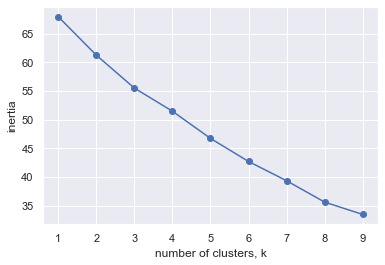

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vect = TfidfVectorizer(stop_words = stop_words1, min_df = 10, max_df = 0.9)# Drop words which occur in less than 10 documents / > 90% of docs
x = vect.fit_transform(df2[df2['Rating'] == 1]['Review Text'].values.astype('U'))

ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(x)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [89]:
df3.head()

,Destination Name,Destination Type,Rating,Polarity,Date,Month,Year,Year Quarter,Review Head,Review Body,Review Text,Review Head Length,Review Body Length,Review Text Length
0,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,Incredible locations don't be put off thinking...,Amazing location must visit. This site is mark...,Incredible locations don't be put off thinking...,72,179,252
1,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,It is a real miracle of the world!,I do recommend to visit Lalibela churches and ...,It is a real miracle of the world! I do recomm...,34,233,268
2,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,Incredible experience,A must visit in Ethiopia - one of the most uni...,Incredible experience A must visit in Ethiopi...,22,103,126
3,Rock-Hewn Churches of Lalibela,Landmarks,4,1,October 2019,October,2019,4,Amazing,These churches have to be seen to be believed....,Amazing These churches have to be seen to be b...,7,241,249
4,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,So much history,Thanks to our tour organiser Ephram who is bas...,So much history Thanks to our tour organiser E...,15,243,259


In [91]:
from textblob import TextBlob
df3['TextBlob Polarity Head'] = df3['Review Head'].map(lambda text: TextBlob(text).sentiment.polarity)
df3['TextBlob Polarity Body'] = df3['Review Body'].map(lambda text: TextBlob(text).sentiment.polarity)
df3['TextBlob Polarity Text'] = df3['Review Text'].map(lambda text: TextBlob(text).sentiment.polarity)
df3.head()

,Destination Name,Destination Type,Rating,Polarity,Date,Month,Year,Year Quarter,Review Head,Review Body,Review Text,Review Head Length,Review Body Length,Review Text Length,TextBlob Polarity Head,TextBlob Polarity Body,TextBlob Polarity Text
0,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,Incredible locations don't be put off thinking...,Amazing location must visit. This site is mark...,Incredible locations don't be put off thinking...,72,179,252,-0.05,0.300000,0.125000
1,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,It is a real miracle of the world!,I do recommend to visit Lalibela churches and ...,It is a real miracle of the world! I do recomm...,34,233,268,0.25,-0.150000,-0.016667
2,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,Incredible experience,A must visit in Ethiopia - one of the most uni...,Incredible experience A must visit in Ethiopi...,22,103,126,0.90,0.345000,0.483750
3,Rock-Hewn Churches of Lalibela,Landmarks,4,1,October 2019,October,2019,4,Amazing,These churches have to be seen to be believed....,Amazing These churches have to be seen to be b...,7,241,249,0.60,0.225000,0.350000
4,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,So much history,Thanks to our tour organiser Ephram who is bas...,So much history Thanks to our tour organiser E...,15,243,259,0.20,0.233333,0.228571


In [94]:
df3.to_csv('ethiopia_tripadvisor_data_2.csv', index = False)

In [95]:
df3 = pd.read_csv('ethiopia_tripadvisor_data_2.csv')
df3.head()

,Destination Name,Destination Type,Rating,Polarity,Date,Month,Year,Year Quarter,Review Head,Review Body,Review Text,Review Head Length,Review Body Length,Review Text Length,TextBlob Polarity Head,TextBlob Polarity Body,TextBlob Polarity Text
0,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,Incredible locations don't be put off thinking...,Amazing location must visit. This site is mark...,Incredible locations don't be put off thinking...,72,179,252,-0.05,0.300000,0.125000
1,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,It is a real miracle of the world!,I do recommend to visit Lalibela churches and ...,It is a real miracle of the world! I do recomm...,34,233,268,0.25,-0.150000,-0.016667
2,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,Incredible experience,A must visit in Ethiopia - one of the most uni...,Incredible experience A must visit in Ethiopi...,22,103,126,0.90,0.345000,0.483750
3,Rock-Hewn Churches of Lalibela,Landmarks,4,1,October 2019,October,2019,4,Amazing,These churches have to be seen to be believed....,Amazing These churches have to be seen to be b...,7,241,249,0.60,0.225000,0.350000
4,Rock-Hewn Churches of Lalibela,Landmarks,5,1,October 2019,October,2019,4,So much history,Thanks to our tour organiser Ephram who is bas...,So much history Thanks to our tour organiser E...,15,243,259,0.20,0.233333,0.228571


In [92]:
df3_positive = df3[df3['Rating'] > 3]
print('For Rating > 3:')
print('Negative Polarity for Head: ', len(df3_positive[df3_positive['TextBlob Polarity Head'] < 0]))
print('Positive Polarity for Head: ', len(df3_positive[df3_positive['TextBlob Polarity Head'] >= 0]))
print('Negative Polarity for Body: ', len(df3_positive[df3_positive['TextBlob Polarity Body'] < 0]))
print('Positive Polarity for Body: ', len(df3_positive[df3_positive['TextBlob Polarity Body'] >= 0]))
print('Negative Polarity for Text: ', len(df3_positive[df3_positive['TextBlob Polarity Text'] < 0]))
print('Positive Polarity for Text: ', len(df3_positive[df3_positive['TextBlob Polarity Text'] >= 0]))

For Rating > 3:
Negative Polarity for Head:  280
Positive Polarity for Head:  6835
Negative Polarity for Body:  538
Positive Polarity for Body:  6577
Negative Polarity for Text:  379
Positive Polarity for Text:  6736


In [93]:
df3_negative = df3[df3['Rating'] < 3]
print('For Rating < 3:')
print('Negative Polarity for Head: ', len(df3_negative[df3_negative['TextBlob Polarity Head'] < 0]))
print('Positive Polarity for Head: ', len(df3_negative[df3_negative['TextBlob Polarity Head'] >= 0]))
print('Negative Polarity for Body: ', len(df3_negative[df3_negative['TextBlob Polarity Body'] < 0]))
print('Positive Polarity for Body: ', len(df3_negative[df3_negative['TextBlob Polarity Body'] >= 0]))
print('Negative Polarity for Text: ', len(df3_negative[df3_negative['TextBlob Polarity Text'] < 0]))
print('Positive Polarity for Text: ', len(df3_negative[df3_negative['TextBlob Polarity Text'] >= 0]))

For Rating < 3:
Negative Polarity for Head:  108
Positive Polarity for Head:  154
Negative Polarity for Body:  107
Positive Polarity for Body:  155
Negative Polarity for Text:  119
Positive Polarity for Text:  143


1. Try Stratified Sampling
2. Clustering
3. Feature Importance
4. Tuning Parameters
5. Word Clouds and n-grams
6. Factor Analysis
7. Scree Plot

In [66]:
# Try Stratified Sampling
# Sample Snippet from Hackathon 5:

# # Class count
# star_rating = df2.star_rating.value_counts()
# star_rating
# # Divide by class
# df3_star1 = df2[df2['star_rating'] == 1]
# df3_star2 = df2[df2['star_rating'] == 2]
# df3_star3 = df2[df2['star_rating'] == 3]
# df3_star4 = df2[df2['star_rating'] == 4]
# df3_star5 = df2[df2['star_rating'] == 5]

# df3_star1s = df3_star1.sample(n = 16000, random_state = 1)
# df3_star1s = df3_star1s.reset_index()
# df3_star1s = df3_star1s.drop(['index'], axis = 1)
# # df3_star1s.head()
# df3_star2s = df3_star2.sample(n = 16000, random_state = 1)
# df3_star2s = df3_star2s.reset_index()
# df3_star2s = df3_star2s.drop(['index'], axis = 1)
# df3_star3s = df3_star3.sample(n = 16000, random_state = 1)
# df3_star3s = df3_star3s.reset_index()
# df3_star3s = df3_star3s.drop(['index'], axis = 1)
# df3_star4s = df3_star4.sample(n = 16000, random_state = 1)
# df3_star4s = df3_star4s.reset_index()
# df3_star4s = df3_star4s.drop(['index'], axis = 1)
# df3_star5s = df3_star5.sample(n = 16000, random_state = 1)
# df3_star5s = df3_star5s.reset_index()
# df3_star5s = df3_star5s.drop(['index'], axis = 1)

# df3_final  = pd.concat([df3_star1s, df3_star2s, df3_star3s, df3_star4s, df3_star5s], axis = 0)
# df3_final = df3_final.reset_index()
# df3_final = df3_final.drop(['index'], axis = 1)
# df3_final.head()
# # df3_final.star_rating.value_counts()
# # df3 = df2.sample(n = 50000, random_state = 1)
# # df3 = df3.reset_index()
# # df3 = df3.drop(['index'], axis = 1)
# # df3.head()